## Import libraries

In [20]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

np.random.seed(1234)
tf.random.set_seed(1234)

## Load model for post processing

In [21]:
act_disc_model = tf.keras.models.load_model('Saved_model')

angles = np.linspace(-30,30,101)

D = 40.
for i in [2.5*D,4*D,7.5*D]:
    X,Y,Z = np.meshgrid(np.array([i]),np.tan(angles*np.pi/180)*i,np.array([45]))
    test_data = np.hstack((X.flatten()[:, None], Y.flatten()[:, None], Z.flatten()[:, None]))
    test_data = tf.cast(test_data,tf.float32)
    if i==2.5*D:
        PINN_2_5D = act_disc_model.predict([test_data[:, 0:1],test_data[:, 1:2],test_data[:, 2:3]])
    elif i==4*D:
        PINN_4D = act_disc_model.predict([test_data[:, 0:1],test_data[:, 1:2],test_data[:, 2:3]])
    else:
        PINN_7_5D = act_disc_model.predict([test_data[:, 0:1],test_data[:, 1:2],test_data[:, 2:3]])


4/4 [==============================] - 0s 3ms/step


## Load data

In [22]:
#Velocity data
data_25D_nibe = pd.read_csv('Data/Velocity/25D.csv')
data_4D_nibe = pd.read_csv('Data/Velocity/4D.csv')
data_75D_nibe = pd.read_csv('Data/Velocity/75D.csv')
theta_kw_25D,kw_25D,theta_ke_25D,ke_25D,theta_sst_25D,sst_25D,theta_rsm_25D,rsm_25D,theta_data_25D,data_25D = data_25D_nibe['theta_kw'],data_25D_nibe['kw'],data_25D_nibe['theta_ke'],data_25D_nibe['ke'],data_25D_nibe['theta_sst'],data_25D_nibe['sst'],data_25D_nibe['theta_rsm'],data_25D_nibe['rsm'],data_25D_nibe['theta_data'],data_25D_nibe['data']
theta_kw_4D,kw_4D,theta_ke_4D,ke_4D,theta_sst_4D,sst_4D,theta_rsm_4D,rsm_4D,theta_data_4D,data_4D = data_4D_nibe['theta_kw'],data_4D_nibe['kw'],data_4D_nibe['theta_ke'],data_4D_nibe['ke'],data_4D_nibe['theta_sst'],data_4D_nibe['sst'],data_4D_nibe['theta_rsm'],data_4D_nibe['rsm'],data_4D_nibe['theta_data'],data_4D_nibe['data']
theta_kw_75D,kw_75D,theta_ke_75D,ke_75D,theta_sst_75D,sst_75D,theta_rsm_75D,rsm_75D,theta_data_75D,data_75D = data_75D_nibe['theta_kw'],data_75D_nibe['kw'],data_75D_nibe['theta_ke'],data_75D_nibe['ke'],data_75D_nibe['theta_sst'],data_75D_nibe['sst'],data_75D_nibe['theta_rsm'],data_75D_nibe['rsm'],data_75D_nibe['theta_data'],data_75D_nibe['data']

In [23]:
#TI
data_25DK_nibe = pd.read_csv('Data/TI/25DK.csv')
data_4DK_nibe = pd.read_csv('Data/TI/4DK.csv')
data_75DK_nibe = pd.read_csv('Data/TI/75DK.csv')
theta_kw_25DK,kw_25DK,theta_ke_25DK,ke_25DK,theta_sst_25DK,sst_25DK,theta_rsm_25DK,rsm_25DK,theta_data_25DK,data_25DK = data_25DK_nibe['theta_kw'],data_25DK_nibe['kw'],data_25DK_nibe['theta_ke'],data_25DK_nibe['ke'],data_25DK_nibe['theta_sst'],data_25DK_nibe['sst'],data_25DK_nibe['theta_rsm'],data_25DK_nibe['rsm'],data_25DK_nibe['theta_data'],data_25DK_nibe['data']
theta_kw_4DK,kw_4DK,theta_ke_4DK,ke_4DK,theta_sst_4DK,sst_4DK,theta_rsm_4DK,rsm_4DK,theta_data_4DK,data_4DK = data_4DK_nibe['theta_kw'],data_4DK_nibe['kw'],data_4DK_nibe['theta_ke'],data_4DK_nibe['ke'],data_4DK_nibe['theta_sst'],data_4DK_nibe['sst'],data_4DK_nibe['theta_rsm'],data_4DK_nibe['rsm'],data_4DK_nibe['theta_data'],data_4DK_nibe['data']
theta_kw_75DK,kw_75DK,theta_ke_75DK,ke_75DK,theta_sst_75DK,sst_75DK,theta_rsm_75DK,rsm_75DK,theta_data_75DK,data_75DK = data_75DK_nibe['theta_kw'],data_75DK_nibe['kw'],data_75DK_nibe['theta_ke'],data_75DK_nibe['ke'],data_75DK_nibe['theta_sst'],data_75DK_nibe['sst'],data_75DK_nibe['theta_rsm'],data_75DK_nibe['rsm'],data_75DK_nibe['theta_data'],data_75DK_nibe['data']

In [24]:
#velocity magnitude
u_2_5D = np.sqrt(np.square(PINN_2_5D[0])+np.square(PINN_2_5D[1])+np.square(PINN_2_5D[2]))
u_5_5D = np.sqrt(np.square(PINN_4D[0])+np.square(PINN_4D[1])+np.square(PINN_4D[2]))
u_8D = np.sqrt(np.square(PINN_7_5D[0])+np.square(PINN_7_5D[1])+np.square(PINN_7_5D[2]))

#turbulence intensity
TI_2_5D = np.sqrt(PINN_2_5D[4]/1.5)/8.5
TI_5_5D = np.sqrt(PINN_4D[4]/1.5)/8.5
TI_8D = np.sqrt(PINN_7_5D[4]/1.5)/8.5

# Velocity Plots

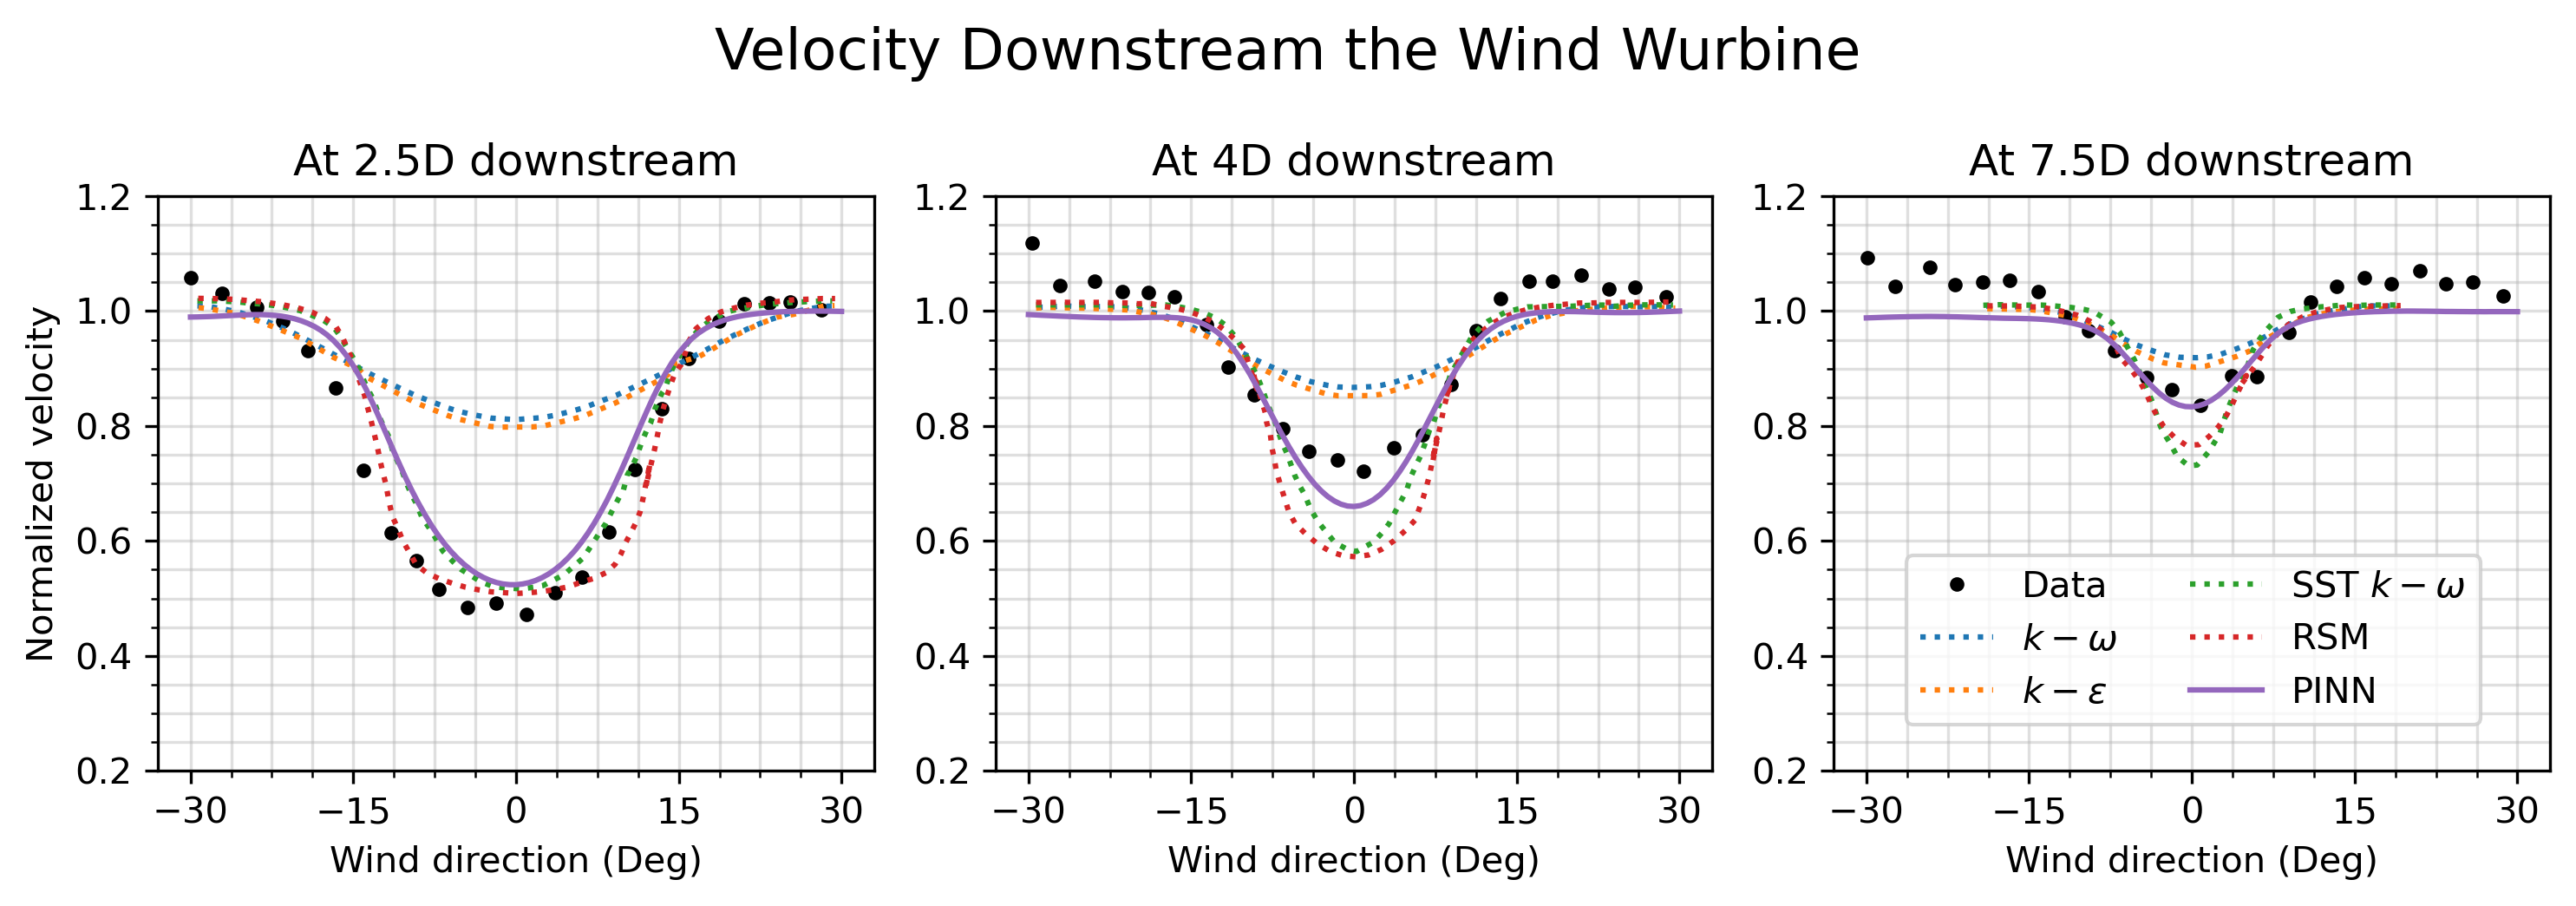

In [25]:
fig, ax = plt.subplots(1, 3, sharex='col',figsize=(10,3.5),dpi=300)

ax[0].plot(theta_data_25D,data_25D,'.k',label = 'Data')
ax[0].plot(theta_kw_25D,kw_25D,':',label = r'$k-\omega$')
ax[0].plot(theta_ke_25D,ke_25D,':',label = r'$k-\epsilon$')
ax[0].plot(theta_sst_25D,sst_25D,':',label = r'SST $k-\omega$')
ax[0].plot(theta_rsm_25D,rsm_25D,':',label = r'RSM')
ax[0].plot(angles, u_2_5D/max(u_2_5D), label = 'PINN')
ax[0].set_xlabel(r'Wind direction (Deg)', fontsize = 10)
ax[0].set_title(r'At 2.5D downstream')
ax[0].set_ylabel(r'Normalized velocity')
ax[0].set_ylim([.2,1.2])
ax[0].grid(which='both',alpha=0.4)
ax[0].minorticks_on()
ax[0].set_xticks(np.linspace(-30,30,5))

ax[1].plot(theta_data_4D,data_4D,'.k')
ax[1].plot(theta_kw_4D,kw_4D,':')
ax[1].plot(theta_ke_4D,ke_4D,':')
ax[1].plot(theta_sst_4D,sst_4D,':')
ax[1].plot(theta_rsm_4D,rsm_4D,':')
ax[1].plot(angles, u_5_5D/max(u_5_5D))
ax[1].set_xlabel(r'Wind direction (Deg)', fontsize = 10)
ax[1].set_title(r'At 4D downstream')
ax[1].set_ylim([.2,1.2])
ax[1].grid(which='both',alpha=0.4)
ax[1].minorticks_on()
ax[1].set_xticks(np.linspace(-30,30,5))


ax[2].plot(theta_data_75D,data_75D,'.k')
ax[2].plot(theta_kw_75D,kw_75D,':')
ax[2].plot(theta_ke_75D,ke_75D,':')
ax[2].plot(theta_sst_75D,sst_75D,':')
ax[2].plot(theta_rsm_75D,rsm_75D,':')
ax[2].plot(angles, u_8D/max(u_8D))
ax[2].set_xlabel(r'Wind direction (Deg)', fontsize = 10)
ax[2].set_title(r'At 7.5D downstream')
ax[2].set_ylim([.2,1.2])
ax[2].grid(which='both',alpha=0.4)
ax[2].minorticks_on()
ax[2].set_xticks(np.linspace(-30,30,5))


fig.legend(loc=(0.74,0.2),ncol=2)
fig.suptitle(fr"Velocity Downstream the Wind Wurbine", fontsize=16)
fig.tight_layout()
plt.savefig(f'Plots/Nibe_Velocity.png',dpi=300)


# Turbulence Intensity Plots

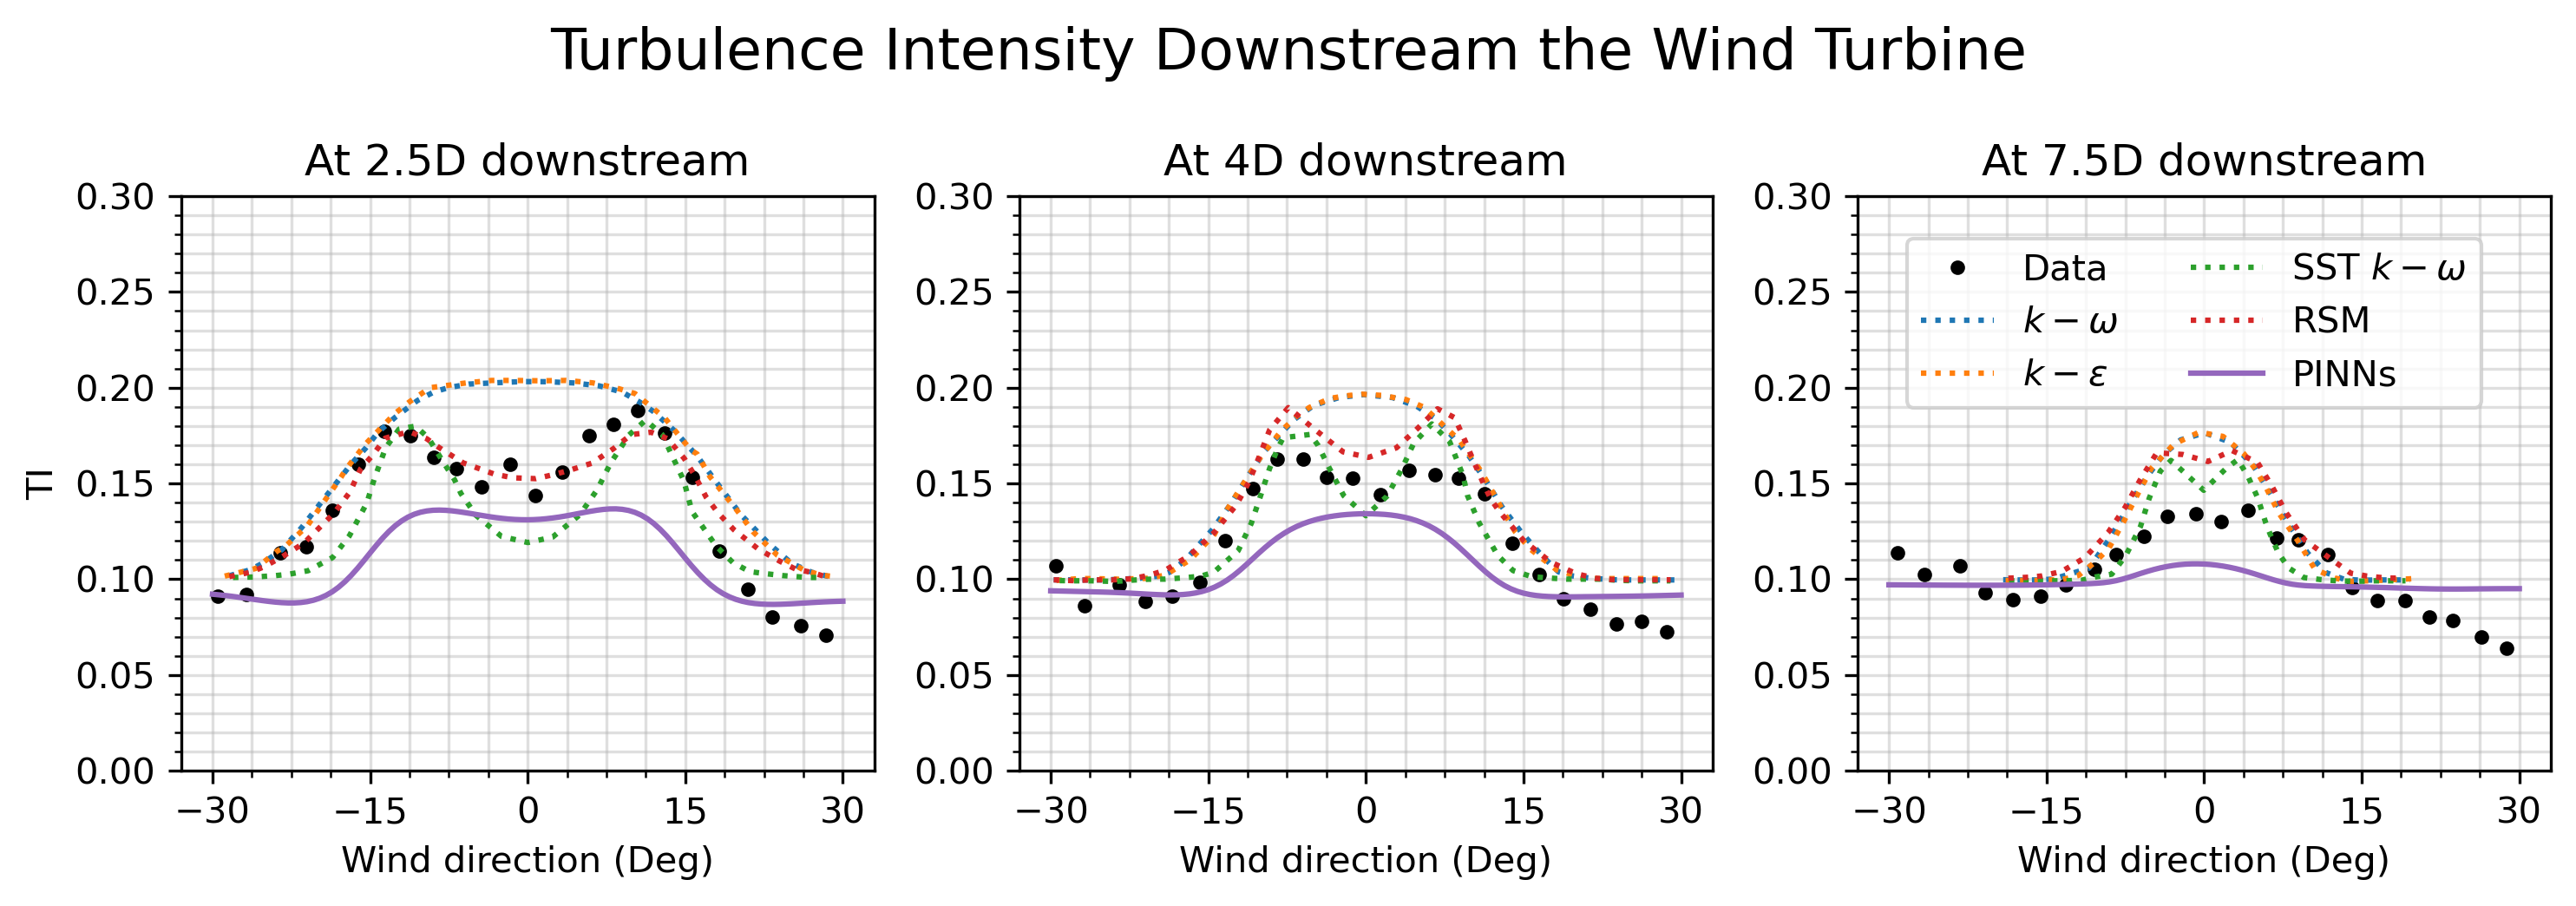

In [26]:
fig, ax = plt.subplots(1, 3, sharex='col',figsize=(10,3.5), dpi=300)

ax[0].plot(theta_data_25DK,data_25DK,'.k',label = 'Data')
ax[0].plot(theta_kw_25DK,kw_25DK,':',label = r'$k-\omega$')
ax[0].plot(theta_ke_25DK,ke_25DK,':',label = r'$k-\epsilon$')
ax[0].plot(theta_sst_25DK,sst_25DK,':',label = r'SST $k-\omega$')
ax[0].plot(theta_rsm_25DK,rsm_25DK,':',label = r'RSM')
ax[0].plot(angles, TI_2_5D , label = 'PINNs')

ax[0].set_xlabel(r'Wind direction (Deg)', fontsize = 10)
ax[0].set_title(r'At 2.5D downstream')
ax[0].set_ylabel(r'TI')
ax[0].set_ylim([.0,.3])
ax[0].grid(which='both',alpha=0.4)
ax[0].minorticks_on()
ax[0].set_xticks(np.linspace(-30,30,5))

ax[1].plot(theta_data_4DK,data_4DK,'.k')
ax[1].plot(theta_kw_4DK,kw_4DK,':')
ax[1].plot(theta_ke_4DK,ke_4DK,':')
ax[1].plot(theta_sst_4DK,sst_4DK,':')
ax[1].plot(theta_rsm_4DK,rsm_4DK,':')

ax[1].plot(angles, TI_5_5D )
ax[1].set_xlabel(r'Wind direction (Deg)', fontsize = 10)
ax[1].set_title(r'At 4D downstream')
ax[1].set_ylim([.0,.3])
ax[1].grid(which='both',alpha=0.4)
ax[1].minorticks_on()
ax[1].set_xticks(np.linspace(-30,30,5))


ax[2].plot(theta_data_75DK,data_75DK,'.k')
ax[2].plot(theta_kw_75DK,kw_75DK,':')
ax[2].plot(theta_ke_75DK,ke_75DK,':')
ax[2].plot(theta_sst_75DK,sst_75DK,':')
ax[2].plot(theta_rsm_75DK,rsm_75DK,':')

ax[2].plot(angles, TI_8D )
ax[2].set_xlabel(r'Wind direction (Deg)', fontsize = 10)
ax[2].set_title(r'At 7.5D downstream')
ax[2].set_ylim([.0,.3])
ax[2].grid(which='both',alpha=0.4)
ax[2].minorticks_on()
ax[2].set_xticks(np.linspace(-30,30,5))

fig.legend(loc=(0.74,0.55),ncol=2)
fig.suptitle(fr"Turbulence Intensity Downstream the Wind Turbine", fontsize=16)
fig.tight_layout()
plt.savefig(f'Plots/Nibe_TI.png',dpi=300)


# Contour Plot Data
Contour plots are generated using ParaView with the data saved in 'Nibe_contour_data.csv'

In [27]:
x_grid = 500
y_grid= 200
Radius = 20.
XX,YY,ZZ = np.meshgrid(np.linspace(-10 * Radius, 25 * Radius,500),np.linspace(-10 * Radius, 10 * Radius,200),np.array([45]))
test_data = [XX.flatten()[:, None], YY.flatten()[:, None], ZZ.flatten()[:, None]]
u,v,w,p,k,eps = act_disc_model.predict(test_data)

3125/3125 [==============================] - 16s 5ms/step


In [28]:
dict = {'x': XX.flatten().tolist(), 'y': YY.flatten().tolist(), 'z': ZZ.flatten().tolist(),
                'u': u.flatten()[:,].tolist(), 'v': v.flatten()[:,].tolist(), 'w': w.flatten()[:,].tolist(),
                  'p': p.flatten()[:,].tolist(), 'k': k.flatten()[:,].tolist(), 'eps': eps.flatten()[:,].tolist()}

df = pd.DataFrame(dict)

df.to_csv(f'Nibe_contour_data.csv')